# **Frequência e Medidas - Challenge**

O objetivo desse aula é que vocês consigam responder algumas perguntas através da análise de dados.

Os dados que deverão ser utilizado nesse script foram baixados do kaggle, e podem ser acessados através do link: https://www.kaggle.com/spscientist/students-performance-in-exams

Este conjunto de dados consiste nas notas obtidas pelos alunos em várias disciplinas e suas informações pessoais. 

Variáveis:
*   ***gender*** - gênero do aluno
*   ***race/ethnicity*** - raça/etnia dos alunos
*   ***parental level of education*** - grau de escolaridade dos pais
*   ***lunch*** - tipo de almoço
*   ***test preparation course*** - indica se fez curso preparatório
*   ***math score*** - nota na prova de matematica
*   ***reading score*** - nota na prova de leitura
*   ***writing score*** - nota na prova de escrita

Os dados são arquivos em .csv.

**OBS**: Não se esqueça de consultar o material da aula passada para eventuais dúvidas sobre o código que deverá ser utilizado.

**OBS2**: Se possível, responda as perguntas com análise descritiva e gráfica.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Leia a base de dados e faça uma análise inicial.

Por exemplo, verifique o tamanho da base de dados e o tipo das variáveis.

In [ ]:
data = pd.read_csv("StudentsPerformance.csv")

In [ ]:
# verificando as primeiras linhas da base de dados
data.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


In [ ]:
# Verificando o tamanho da base de dados
data.shape

(1000, 8)

In [ ]:
# verificando o tipo de variaveis
data.info()
# OBS: nesse caso não precisaremos modificar o tipo de nenhuma variável, pois todas estão no formato esperado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# verificando o nome das colunas
data.columns
# OBS: nesse caso podemos ver que os nomes das variáveis não estão em um bom padrão, tendo a presença de espaço e "/" nos nomes das variáveis. Por isso, o ideal é renomear as variáveis para um padrão adequado.

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# trocando os espaços e "/" por "_" no nome das variáveis
data.columns = data.columns.str.replace(" ", "_").str.replace("/","_")

In [ ]:
# verificando os novos nomes das colunas
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

### Idenfique as variáveis qualitativas e quantitativas.

In [ ]:
# qualitativas: gender; race_ethnicity; parental_level_of_education; lunch; test_preparation_course
# quantitativas: math_score; reading_score; writing_score

### Alguma variável precisa ser alterada ou criada? Faça as alterações que julgar necessária.

In [ ]:
# nesse caso nenhuma variável PRECISA ser alterada, mas caso queiram podem mudar alguma variável ou criar outras variáveis

### Verifique a quantidade de alunos em cada grupo racial/étnico.

In [ ]:
# criando tabela de frequência da variável race/ethnicity
pd.crosstab( data["race_ethnicity"], "count" )

col_0,count
race_ethnicity,
group A,89
group B,190
group C,319
group D,262
group E,140


In [ ]:
# salvando a tabela de frequência em um dataframe, onde a raça/etnia é uma coluna (obs: na saída original do crosstab o grupo de etnia é o nome da linha, e não uma coluna)
data_race = pd.crosstab( data["race_ethnicity"], "count" ).reset_index()
data_race

col_0,race_ethnicity,count
0,group A,89
1,group B,190
2,group C,319
3,group D,262
4,group E,140


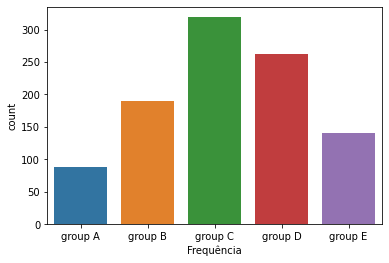

In [ ]:
# criando gráfico da quantidade de alunos por grupo racial
sns.barplot(x = "race_ethnicity", y = "count", data = data_race)
plt.xlabel("Grupo racial/étnico")
plt.xlabel("Frequência")
plt.show()

### Qual a quantidade de alunos de cada gênero? Existem mais alunos do gênero masculino ou feminino?

In [ ]:
# tabela de frequência por gênero
pd.crosstab( data["gender"], "count" )
# OBS: observamos que a maior quantidade é do sexo feminino

col_0,count
gender,
female,518
male,482


In [ ]:
# se a variável do agrupamento tiver muitas variaveis e for dificil achar qual o grupo com maior frequência, temos como ordenar a tabela de frequência para que o primeiro valor seja o mais frequente
pd.crosstab( data["gender"], "count" ).sort_values("count", ascending = False)


col_0,count
gender,
female,518
male,482


### Analise as notas de matemática dos alunos de forma mais completa possível.

Dica: Identifique o tipo de variável e faça todas análises que você sabe que pode ser aplicado para esse tipo de variável. Por exemplo, se for uma variável quantitativa calcule a média, mediana, quartis, etc. Já se for uma variável qualitativa faça a tabela de fequência, moda, etc.

OBS: Faça também análises gráficas.

In [ ]:
# summarização da nota de matemática
data["math_score"].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

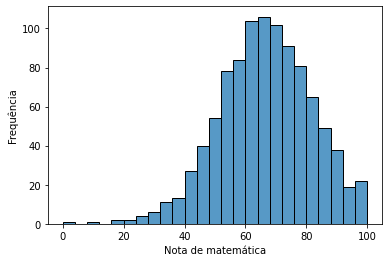

In [ ]:
# análise gráfica das notas de matemática através de um histograma
sns.histplot( data = data, x = "math_score")
plt.xlabel( "Nota de matemática" )
plt.ylabel( "Frequência" )
plt.show()
# OBS: verificamos que as notas de matemática estão concentradas em torno de 70 e que a distribuição é assimétrica a esquerda

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


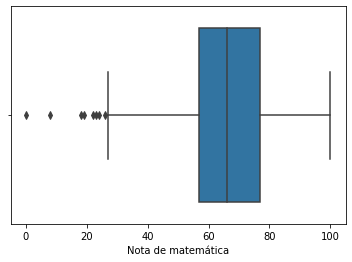

In [ ]:
# análise gráfica das notas de matemática através de um histograma
sns.boxplot( data["math_score"] )
plt.xlabel( "Nota de matemática" )
plt.show()
# OBS: vemos que a grande parte dos alunos tiraram notas entre 60 e 80. Alem disso, notas muito baixas (menor que aprox 25) são pouco frequentes e há indício que podem ser consideradas como outliers

### Qual a nota média de matemática dos alunos segundo o grau de escolaridade dos pais? Faça a mesma análise para as notas de leitura e escrita.

In [ ]:
# nota média de matemática segundo o grau de escolaridade dos pais
data.groupby(['parental_level_of_education'])['math_score'].mean()

parental_level_of_education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math_score, dtype: float64

In [ ]:
# A partir daqui iremos mostrar outras análises que poderiam ser feitas para comparar a nota de matemático de acordo com o grau de escolaridade dos pais

# notas de matematica pelo grau de escolaridade dos pais
data_pivot = data.pivot(columns = "parental_level_of_education", values = "math_score")
data_pivot

parental_level_of_education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,NaN,72.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,69.0,NaN
2,NaN,NaN,NaN,90.0,NaN,NaN
3,47.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,76.0,NaN
...,...,...,...,...,...,...
995,NaN,NaN,NaN,88.0,NaN,NaN
996,NaN,NaN,62.0,NaN,NaN,NaN
997,NaN,NaN,59.0,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,68.0,NaN


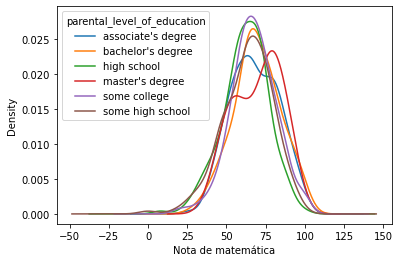

In [ ]:
# criando gráfico de densidade para comparar a distribuição das notas de matemática pelo grau de escolaridade dos pais
data_pivot.plot.density()
plt.xlabel( "Nota de matemática" )
plt.show()

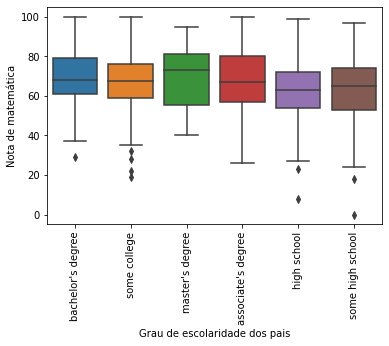

In [ ]:
# criando boxplot para comparar a distribuição das notas de matemática pelo grau de escolaridade dos pais

sns.boxplot( x = "parental_level_of_education", y = "math_score", data = data )
plt.xticks( rotation = 90 )
plt.xlabel( "Grau de escolaridade dos pais" )
plt.ylabel( "Nota de matemática" )
plt.show()

### Verifique gráficamente a relação da nota de leitura e de escrita.

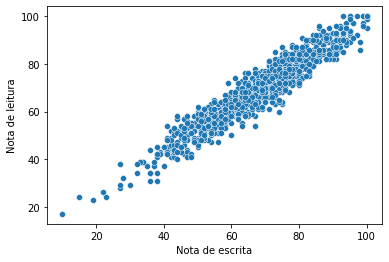

In [ ]:
# gráfico de dispersão entre as notas de leitura e escrita
sns.scatterplot( data = data, x = "writing_score", y = "reading_score")
plt.xlabel( "Nota de escrita" )
plt.ylabel( "Nota de leitura" )
plt.show()

### Faça alguma outra análise que você ache pertinente.

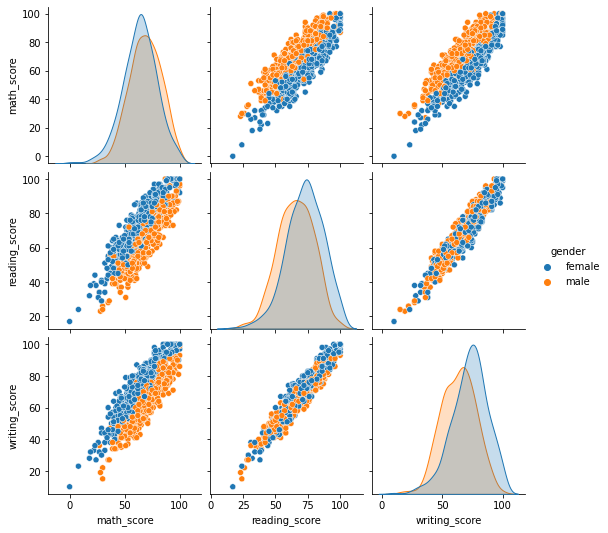

In [ ]:
# gráfico de dispersão comparativo entre as variáveis de nota, segregado pelo gênero
sns.pairplot( data[["math_score", "reading_score", "writing_score", "gender"]], hue = "gender" );